>>>>>>TASK-1 DATA EXPLORATION AND PREPROCESSING

In [2]:
import pandas as pd                             #importing the required libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1=pd.read_csv('Dataset.csv')                     #loading the dataset into the jupyter notebook
df1.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df1.shape             

(9551, 21)

It has 9551 rows and 21 columns.

In [5]:
df1.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

From the above observation we found that there is no missing data

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

4 columns have data types object where the values are either YES or NO so we have to change YES to 1 and NO to 0 so that we can have numeric values

In [7]:
df1['Has Table booking'].replace({'Yes':1,'No':0},inplace=True)
df1['Has Online delivery'].replace({'Yes':1,'No':0},inplace=True)
df1['Is delivering now'].replace({'Yes':1,'No':0},inplace=True)
df1['Switch to order menu'].replace({'Yes':1,'No':0},inplace=True)


In [8]:
df1['Has Table booking'] = pd.to_numeric(df1['Has Table booking'])
df1['Has Online delivery'] = pd.to_numeric(df1['Has Online delivery'])
df1['Is delivering now'] = pd.to_numeric(df1['Is delivering now'])
df1['Switch to order menu'] = pd.to_numeric(df1['Switch to order menu'])

In [9]:
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   int64  
 13  Has Online delivery   9551 non-null   int64  
 14  Is delivering now     9551 non-null   int64  
 15  Switch to order menu 

In [11]:
df1['Aggregate rating'].describe()

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

The above descrptive analysis of the AGGREGATE RATING columns tells us that the rating is in between 0 and 5 with a maximum rating of 4.9 and minimum rating of 0.0 and the mean rating is 2.66 with a standard deviation of 1.51

>>>>>>>>TASK-2 DESCRIPTIVE ANALYSIS

The numerical columns here are Longitude , Latitude ,Average Cost for two and Votes so we will define functions to find out the mean , median and standard deviation of these columns

In [12]:
def mean(x):
    mean_value=x.mean()
    return  mean_value

def median(x):
    median_value=x.median()
    return median_value

def std(x):
    std_value=x.std()
    return std_value
    

In [13]:
print(mean(df1.Votes))
print(mean(df1.Longitude))
print(mean(df1.Latitude))
print(mean(df1['Average Cost for two']))

156.909747670401
64.12657446168706
25.854380700074756
1199.2107632708617


In [14]:
print(median(df1.Votes))
print(median(df1.Longitude))
print(median(df1.Latitude))
print(median(df1['Average Cost for two']))

31.0
77.1919642
28.57046888
400.0


In [15]:
print(std(df1.Votes))
print(std(df1.Longitude))
print(std(df1.Latitude))
print(std(df1['Average Cost for two']))

430.1691453762912
41.46705784761728
11.007935124784668
16121.183073499644


=>Given above is the mean , median and standard deviation of the numerical columns.

>Distribution of categorical variables like country code , city and cuisines.

In [16]:
df1['Country Code'].describe()

count    9551.000000
mean       18.365616
std        56.750546
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       216.000000
Name: Country Code, dtype: float64

In [17]:
print(df1['Country Code'].unique())
print(len(df1['Country Code'].unique()))

[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]
15


=>The above analysis gives that there are total 9551 country codes of which 15 are unique.

In [18]:
df1['City'].describe()

count          9551
unique          141
top       New Delhi
freq           5473
Name: City, dtype: object

=>The above analysis gives that the total count of cities are 9551 of which 141 are unique with New Delhi having the maximum frequency of 5473.

In [19]:
df1['Cuisines'].describe()

count             9542
unique            1825
top       North Indian
freq               936
Name: Cuisines, dtype: object

=>The above analysis gives the total count of cuisines are 9542 of which 1825 are unique with North Indian cuisine having the maximum frquency of 936.

In [20]:
print('The top 5 cuisisnes are listed below:')
df1['Cuisines'].value_counts().head(5)

The top 5 cuisisnes are listed below:


Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

In [21]:
print('The top 5 cities with the highest number of restaurants are given below:')
df1['City'].value_counts().head(5)

The top 5 cities with the highest number of restaurants are given below:


City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

>>>>>>>>TASK-3 GEOSPATIAL ANALYSIS

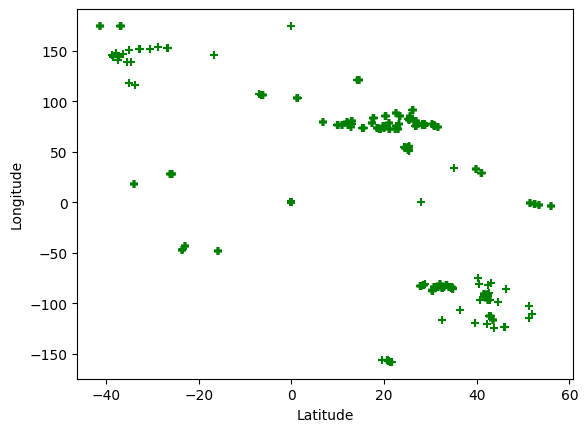

In [22]:
df2=df1[['Latitude','Longitude','Aggregate rating']]
df2
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(df2.Latitude,df2.Longitude , marker='+' , color='green')


        


The graph shown above shows the distribution of restaurants at different latitudes and longitudes

In [23]:
Corr_Matrix=round(df2.corr(),2)
Corr_Matrix

,Latitude,Longitude,Aggregate rating
Latitude,1.00,0.04,0.00
Longitude,0.04,1.00,-0.12
Aggregate rating,0.00,-0.12,1.00


From the above correlation matrix we can clearly see that there's no correlation between Latitude and Aggregate rating whereas there's slight correlation between Longitude and Aggregate rating.


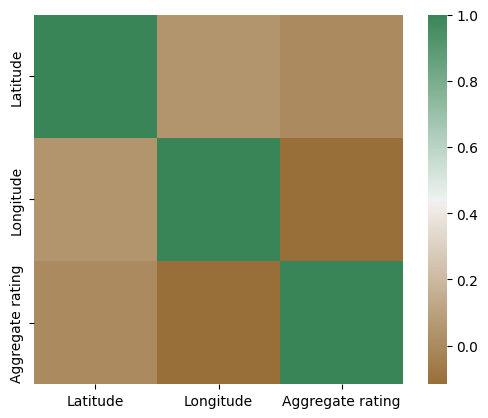

In [25]:
import seaborn as sns
Correlation_df2=df2.corr()
corr=sns.heatmap(
    Correlation_df2,
    
    cmap=sns.diverging_palette(50,500,n=500),
    square=True
)
plt.show()

In [26]:
import folium

In [31]:
map_center=[df1['Latitude'].mean(),df1['Longitude'].mean()]
my_map=folium.Map(location=map_center,zoom_start=10)

for _, row in df1.iterrows():
    folium.Marker([row['Latitude'],row['Longitude']],popup=row['Restaurant Name'],marker='*',color='blue')

my_map